In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных из CSV файла
df = pd.read_csv('eshkere (2).csv', encoding='latin-1', sep=';')
df.head()

,id,ticker,name,today_price,listing_price,max_price,min_price,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,8718,ECO,ECO,0.014127,NaN,0.026143889,0.014126836,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11145,PLS,Pulsechain,0.000052,NaN,0.000320602,2.78E-05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11841,ARB,Arbitrum,1.189165,NaN,2.397491938,0.7453409,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11919,FORWARD,Forward Protocol,0.003045,0.005,0.028728345,0.00300367,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13631,MANTA,Manta Network,1.730352,NaN,4.082953051,1.38018418,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
#костыль, который страшно убрать
df.to_string(float_format='{:f}'.format)
df.head()

,id,ticker,name,today_price,listing_price,max_price,min_price,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,8718,ECO,ECO,0.014127,NaN,0.026143889,0.014126836,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11145,PLS,Pulsechain,0.000052,NaN,0.000320602,2.78E-05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11841,ARB,Arbitrum,1.189165,NaN,2.397491938,0.7453409,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11919,FORWARD,Forward Protocol,0.003045,0.005,0.028728345,0.00300367,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13631,MANTA,Manta Network,1.730352,NaN,4.082953051,1.38018418,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
#костыль, который помогал определить, где косячные данные
for index, value in df['max_price'].items():
    try:
        float_value = float(value)
    except ValueError:
        print(f"Строка с ошибочным значением: {index}")

In [84]:
#готовим данные, чтобы можно было работать с числами
df['today_price'] = pd.to_numeric(df['today_price'], errors='coerce')
df['listing_price'] = pd.to_numeric(df['listing_price'], errors='coerce')
df['max_price'] = pd.to_numeric(df['max_price'], errors='coerce')
df['min_price'] = pd.to_numeric(df['min_price'], errors='coerce')

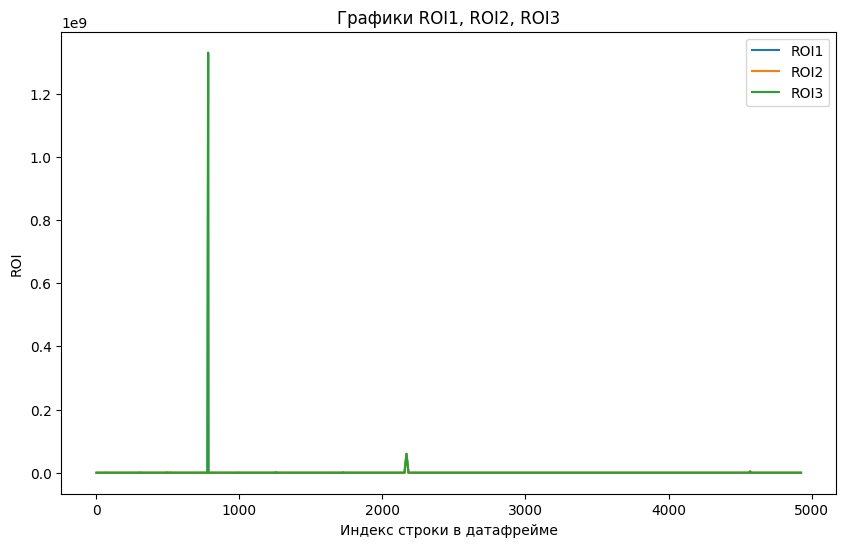

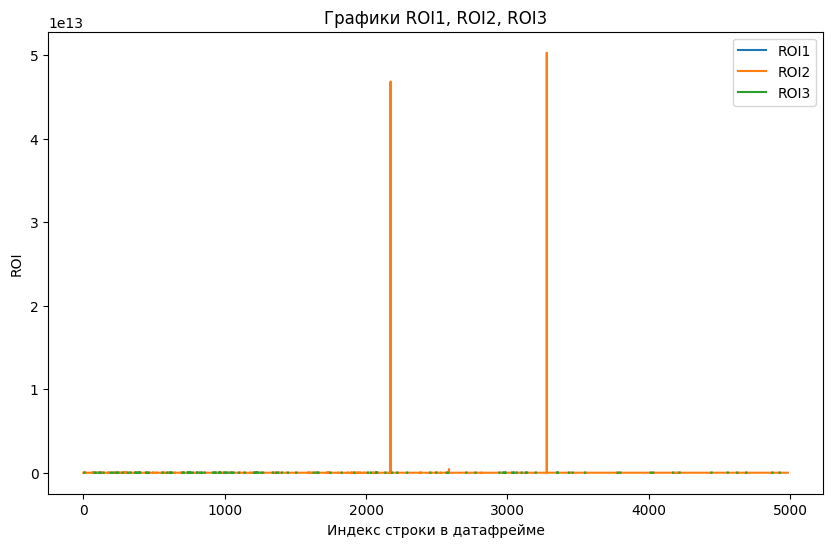

In [90]:

# Расчет рои1, рои2, рои3
df['roi1'] = df['today_price'] / df['listing_price']
df['roi2'] = df['today_price'] / df['min_price']
df['roi3'] = df['today_price'] / df['listing_price']
df.loc[df['min_price'] < df['listing_price'] , 'roi3'] = df['today_price'] / df['min_price']

# Удаляем строки с пропущенными значениями в столбцах roi1, roi2, roi3
df_clean = df[['roi1', 'roi2', 'roi3']].dropna()

# Создаем график
plt.figure(figsize=(10, 6))

plt.plot(df_clean.index, df_clean['roi1'], label='ROI1')
plt.plot(df_clean.index, df_clean['roi2'], label='ROI2')
plt.plot(df_clean.index, df_clean['roi3'], label='ROI3')

plt.xlabel('Индекс строки в датафрейме')
plt.ylabel('ROI')
plt.title('Графики ROI1, ROI2, ROI3')
plt.legend()

plt.show()

plt.figure(figsize=(10, 6))

plt.plot(df.index, df['roi1'], label='ROI1')
plt.plot(df.index, df['roi2'], label='ROI2')
plt.plot(df.index, df['roi3'], label='ROI3')

plt.xlabel('Индекс строки в датафрейме')
plt.ylabel('ROI')
plt.title('Графики ROI1, ROI2, ROI3')
plt.legend()

plt.show()



In [93]:
# Гипотеза 1: заработаем ли, если вкладываем на листинге и продаем на макс
total_profit = sum(df['max_price'] - df['listing_price'])

# Гипотеза 2: будем ли в плюсе по текущим ценам, если просто держим
current_profit = sum(df['today_price'] - df['listing_price'])

# Гипотеза 3: когда выгоднее покупать
total_profit_start = sum(df['today_price'] - df['listing_price'])
total_profit_min = sum(df['today_price'] - df['min_price'])

if total_profit_start > total_profit_min:
    print("Выгоднее покупать на начальной цене")
else:
    print("Выгоднее подождать минимальной цены")

Выгоднее подождать минимальной цены


In [99]:

# Удаление строк с NaN значениями
df_cleaned = df.dropna(subset=['max_price', 'listing_price', 'today_price', 'min_price'])


# Гипотеза 1: заработаем ли, если вкладываем на листинге и продаем на макс
total_profit = sum(df_cleaned['max_price'] - df_cleaned['listing_price'])

print("Потенциальная прибыль от инвестирования в листинг и продажи по максимальной цене: ", total_profit)


# Гипотеза 2: будем ли в плюсе по текущим ценам, если просто держим
current_profit = sum(df_cleaned['today_price'] - df_cleaned['listing_price'])

print("Потенциальная прибыль по текущим ценам, если просто удерживать активы: ", current_profit)


# Гипотеза 3: когда выгоднее покупать
total_profit_start = sum(df_cleaned['today_price'] - df_cleaned['listing_price'])
total_profit_min = sum(df_cleaned['today_price'] - df_cleaned['min_price'])

if total_profit_start > total_profit_min:
    print("Выгоднее покупать на начальной цене")
else:
    print("Выгоднее подождать минимальной цены")


# Гипотеза 4: заработаем ли, если купим по минимальным ценам и продадим по текущим
profit_buy_min_sell_today = sum(df_cleaned['today_price'] - df_cleaned['min_price'])

if profit_buy_min_sell_today > 0:
    print("Заработаем, если купим по минимальным ценам и продадим по текущим")
else:
    print("Не заработаем, даже если купим по минимальным ценам и продадим по текущим")




Потенциальная прибыль от инвестирования в листинг и продажи по максимальной цене:  181094564242.21622
Потенциальная прибыль по текущим ценам, если просто удерживать активы:  83330.13627490304
Выгоднее подождать минимальной цены
Заработаем, если купим по минимальным ценам и продадим по текущим
